In [1]:
#Importing Libraries
from numpy import array
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
#import the librearies
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense,LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [2]:
import yfinance as yf
#data = yf.download("AAPL", start="2017-01-01", end="2017-04-30")
#show the data
aapl=yf.Ticker('AAPL')
df=aapl.history(start="2010-01-01",  end="2023-02-03")
df.tail()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2023-01-27 00:00:00-05:00,143.160004,147.229996,143.080002,145.929993,70492800,0.0,0.0
2023-01-30 00:00:00-05:00,144.960007,145.550003,142.850006,143.000000,64015300,0.0,0.0
2023-01-31 00:00:00-05:00,142.699997,144.339996,142.279999,144.289993,65874500,0.0,0.0
2023-02-01 00:00:00-05:00,143.970001,146.610001,141.320007,145.429993,77663600,0.0,0.0
2023-02-02 00:00:00-05:00,148.899994,151.179993,148.169998,150.820007,118339000,0.0,0.0


In [3]:
#create a new dataframe with only the close column
data=df.filter(['Close'])
#convert the dataframe to numpy array
dataset=data.values
#Get the number of rows to train the model on
training_data_len=math.ceil(len(dataset)*.8)
training_data_len

2636

In [4]:
print(dataset)

[[  6.51521254]
 [  6.52647686]
 [  6.4226656 ]
 ...
 [144.28999329]
 [145.42999268]
 [150.82000732]]


In [5]:
#Scale the data
scaler=MinMaxScaler(feature_range=(0,1))
scaled_data=scaler.fit_transform(dataset)
scaled_data

array([[0.00381776],
       [0.00388208],
       [0.00328926],
       ...,
       [0.79059392],
       [0.797104  ],
       [0.8278842 ]])

In [6]:
#Create the training dataset
#Create the scaled training dataset
train_data=scaled_data[0:training_data_len,:]
#Split the data into x_train and y_train data sets
x_train=[]
y_train=[]
for i in range(60,len(train_data)):
    x_train.append(train_data[i-60:i,0])
    y_train.append(train_data[i,0])

In [7]:
print(x_train)

[array([3.81775667e-03, 3.88208268e-03, 3.28925845e-03, 3.22144425e-03,
       3.46483363e-03, 3.13973717e-03, 2.72423902e-03, 3.23362161e-03,
       3.02151978e-03, 2.41304905e-03, 3.99681459e-03, 3.42137415e-03,
       2.78507956e-03, 9.90946758e-04, 1.91582749e-03, 2.41479451e-03,
       2.75204110e-03, 1.25868542e-03, 1.74001269e-06, 4.65914947e-04,
       6.62373000e-04, 1.24824262e-03, 0.00000000e+00, 5.92824230e-04,
       3.59869479e-04, 7.19749850e-04, 5.33718259e-04, 1.15088360e-03,
       1.44816981e-03, 1.97320707e-03, 1.82543397e-03, 1.89148638e-03,
       1.67243811e-03, 1.45513258e-03, 8.70989357e-04, 1.49686021e-03,
       1.72981769e-03, 2.18530345e-03, 2.94503275e-03, 2.92068891e-03,
       3.00413327e-03, 3.24404535e-03, 4.67657683e-03, 4.69917521e-03,
       5.38415204e-03, 5.70056477e-03, 5.81529396e-03, 6.00653470e-03,
       5.52670510e-03, 5.63275056e-03, 5.57539005e-03, 5.66752631e-03,
       5.25027998e-03, 5.68491554e-03, 6.31250463e-03, 6.48810431e-03,
     

In [8]:
#convert the x_train and y_train to numpy arrays
x_train,y_train=np.array(x_train),np.array(y_train)

In [9]:
#Reshape the data
x_train=np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))
x_train.shape

(2576, 60, 1)

In [3]:
# Defining model Architecture
model = Sequential()
model.add(Conv1D(filters=64, kernel_size=2, activation='relu', input_shape=(60,
1)))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(100, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

NameError: name 'Sequential' is not defined

In [17]:
model.fit(x_train,y_train,epochs=20, verbose=0)


In [19]:
#Create the testing data set
#Create a new array containing scaled values from index 2101 to 2701
test_data=scaled_data[training_data_len-60:,:]
#Create the data sets x_test and y_test
x_test=[]
y_test=dataset[training_data_len:,:]
for i in range(60,len(test_data)):
    x_test.append(test_data[i-60:i,0])
#Convert the data to a numpy array
x_test=np.array(x_test)
#reshape the data
x_test=np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))

In [20]:
y_test

array([[ 88.6342392 ],
       [ 89.81091309],
       [ 87.05140686],
       [ 89.05765533],
       [ 89.80106354],
       [ 89.63121033],
       [ 89.63121033],
       [ 92.028862  ],
       [ 91.74330139],
       [ 93.88002014],
       [ 94.28374481],
       [ 94.4486618 ],
       [ 94.01295471],
       [ 95.56872559],
       [ 96.22598267],
       [ 95.04193115],
       [ 94.84992981],
       [ 96.8487854 ],
       [ 95.51209259],
       [ 95.7804184 ],
       [ 91.4208374 ],
       [ 91.19435883],
       [ 93.35569763],
       [ 91.82209015],
       [ 93.58216858],
       [ 94.71452332],
       [104.63006592],
       [107.26649475],
       [107.98283386],
       [108.37422943],
       [112.15533447],
       [109.60539246],
       [111.19848633],
       [107.89146423],
       [111.47715759],
       [113.45002747],
       [113.34893036],
       [113.05299377],
       [113.99504089],
       [114.13806152],
       [116.67074585],
       [122.68308258],
       [124.15039825],
       [123

In [21]:
predictions=model.predict(x_test)
predictions=scaler.inverse_transform(predictions)
predictions

21/21 [==============================] - 0s 2ms/step


array([[ 84.82264 ],
       [ 86.07482 ],
       [ 86.15768 ],
       [ 86.754036],
       [ 86.669914],
       [ 87.00758 ],
       [ 87.32909 ],
       [ 87.786545],
       [ 88.003044],
       [ 88.39246 ],
       [ 88.97201 ],
       [ 90.018974],
       [ 90.93939 ],
       [ 91.21593 ],
       [ 91.466225],
       [ 91.731804],
       [ 92.63662 ],
       [ 92.92139 ],
       [ 93.02858 ],
       [ 93.01416 ],
       [ 93.27341 ],
       [ 93.25555 ],
       [ 92.927345],
       [ 91.741714],
       [ 91.19837 ],
       [ 90.653496],
       [ 90.607155],
       [ 91.07505 ],
       [ 94.04164 ],
       [ 97.2338  ],
       [ 99.370804],
       [101.47708 ],
       [103.74364 ],
       [105.07985 ],
       [106.08479 ],
       [106.4701  ],
       [107.58819 ],
       [109.15273 ],
       [109.78428 ],
       [110.55118 ],
       [111.29481 ],
       [111.95054 ],
       [113.119865],
       [115.588234],
       [117.71867 ],
       [119.096825],
       [120.41964 ],
       [121.0

In [23]:
rmse=np.sqrt(np.mean(predictions-y_test)**2)
rmse

4.149108318572349

C:\Users\HOME\AppData\Local\Temp\ipykernel_6888\1480295259.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Prediction']=predictions


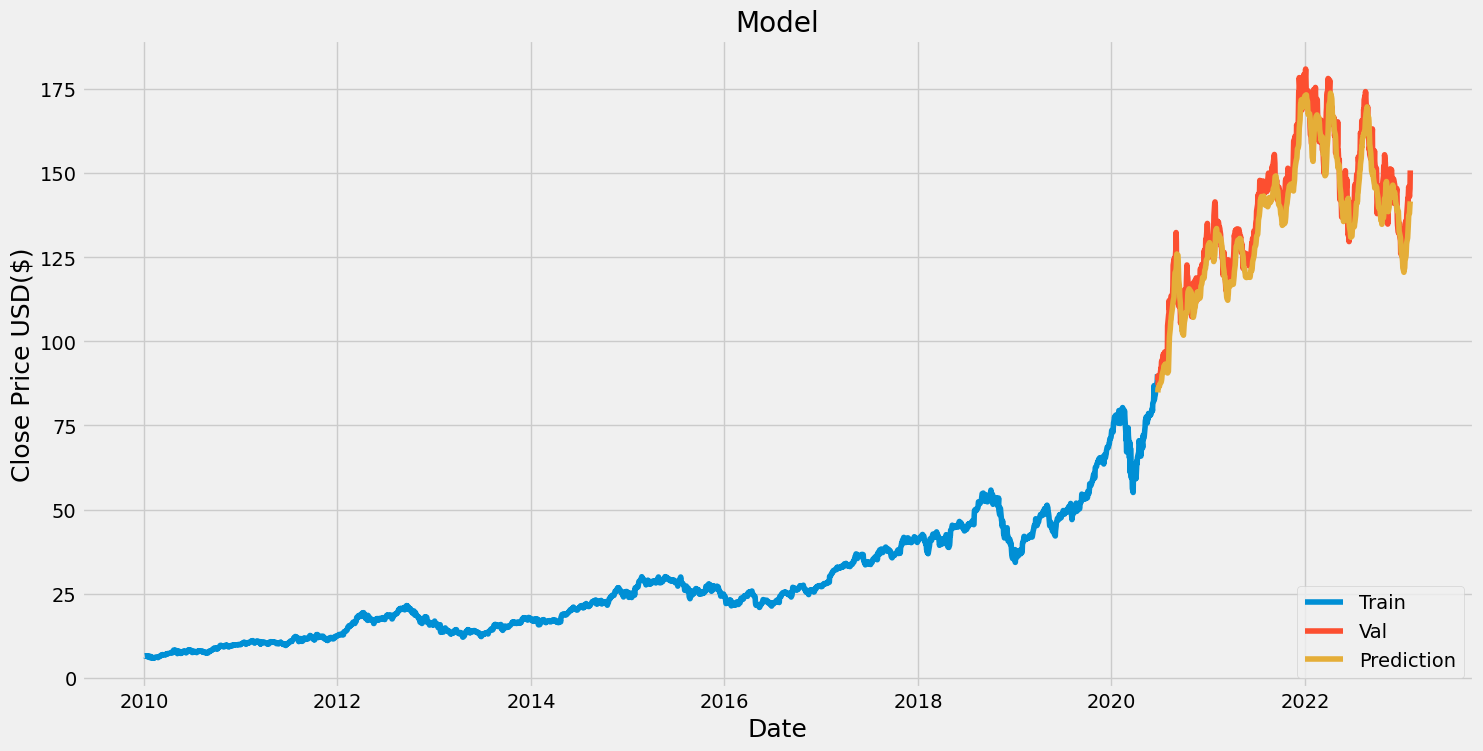

In [24]:
#Plot the data
train=data[:training_data_len]
valid=data[training_data_len:]
valid['Prediction']=predictions
#visualize the data
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date',fontsize=18)
plt.ylabel('Close Price USD($)',fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close','Prediction']])
plt.legend(['Train','Val','Prediction'],loc='lower right')
plt.show()